In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
#Convertir en dataframe
df1= pd.read_csv("diamonds.csv")
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [184]:
#Corroboramos valores nulos para Dublin
valores_nulos=df1.isnull().sum()
valores_nulos

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

***VALORES NULOS***

In [185]:
#Limpieza de Dublin
df_sin_nulos = df1.fillna(method="ffill")
df = df_sin_nulos.fillna(method="bfill")

/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_13351/2415654202.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sin_nulos = df1.fillna(method="ffill")
/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_13351/2415654202.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df_sin_nulos.fillna(method="bfill")


In [186]:
#Corroboramos valores nulos para Dublin
valores_nulos=df.isnull().sum()
valores_nulos

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

***OUTLIERS***

In [187]:
df_numerico = df.select_dtypes(include=['number'])
df_numerico.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [188]:
df_categoricas = df[['cut', 'color', 'clarity']]
df_categoricas.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


<Figure size 1500x800 with 0 Axes>

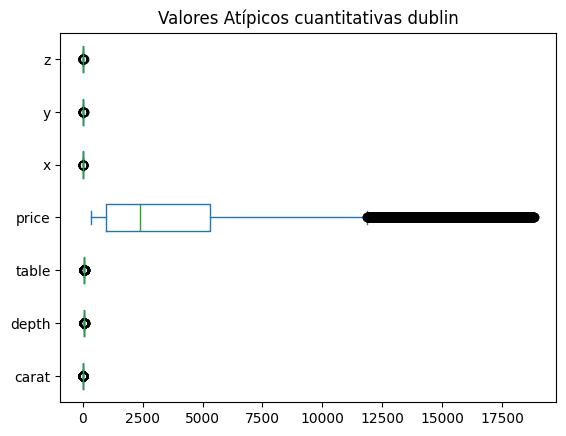

In [189]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_numerico.plot(kind='box', vert=False)
plt.title("Valores Atípicos cuantitativas dublin")
plt.show() #dibujamos el diagrama

In [190]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_numerico
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido carat        2.220013
depth       66.047343
table       64.160565
price    15901.118934
x            9.096451
y            9.160930
z            5.655821
dtype: float64
Limite inferior permitido carat      -0.624106
depth      57.451549
table      50.753914
price   -8035.519527
x           2.365846
y           2.308122
z           1.421640
dtype: float64


In [191]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
outliersdata1= df_numerico[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliersdata1.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [192]:
#Corroboramos valores nulos del dataframe
valores_nulosdata1=outliersdata1.isnull().sum()
valores_nulosdata1

carat     412
depth     685
table     336
price    1206
x          43
y          34
z          55
dtype: int64

In [193]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_cleandata1=outliersdata1.copy()
data_cleandata1=data_cleandata1.fillna(round(outliersdata1.mean(),1))
data_cleandata1.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [194]:
#Corroboramos valores nulos del dataframe
valores_nulosdata1=data_cleandata1.isnull().sum()
valores_nulosdata1

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [195]:
df_limpio = pd.concat([df_categoricas,data_cleandata1], axis=1)
df_limpio.head()

,cut,color,clarity,carat,depth,table,price,x,y,z
0,Ideal,E,SI2,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,Premium,E,SI1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,Good,E,VS1,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,Premium,I,VS2,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,Good,J,SI2,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [196]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(data_cleandata1)

In [197]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=data_cleandata1.corr()
Corr_Factors

,carat,depth,table,price,x,y,z
carat,1.000000,0.011210,0.185164,0.851292,0.958470,0.957180,0.956364
depth,0.011210,1.000000,-0.277018,-0.002333,-0.031849,-0.033720,0.074948
table,0.185164,-0.277018,1.000000,0.128062,0.195985,0.190797,0.159839
price,0.851292,-0.002333,0.128062,1.000000,0.842965,0.844281,0.840173
x,0.958470,-0.031849,0.195985,0.842965,1.000000,0.997742,0.989128
y,0.957180,-0.033720,0.190797,0.844281,0.997742,1.000000,0.988673
z,0.956364,0.074948,0.159839,0.840173,0.989128,0.988673,1.000000


In [198]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,carat,depth,table,price,x,y,z
carat,1.000000,0.011210,0.185164,0.851292,0.958470,0.957180,0.956364
depth,0.011210,1.000000,0.277018,0.002333,0.031849,0.033720,0.074948
table,0.185164,0.277018,1.000000,0.128062,0.195985,0.190797,0.159839
price,0.851292,0.002333,0.128062,1.000000,0.842965,0.844281,0.840173
x,0.958470,0.031849,0.195985,0.842965,1.000000,0.997742,0.989128
y,0.957180,0.033720,0.190797,0.844281,0.997742,1.000000,0.988673
z,0.956364,0.074948,0.159839,0.840173,0.989128,0.988673,1.000000


<Axes: >

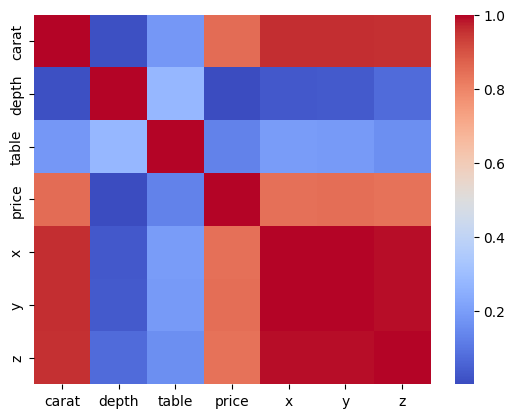

In [199]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

# ***Modelos de regresión lineal***

***Modelo para predecir Price con Carat***

In [200]:
df=df_limpio

<Axes: xlabel='carat', ylabel='price'>

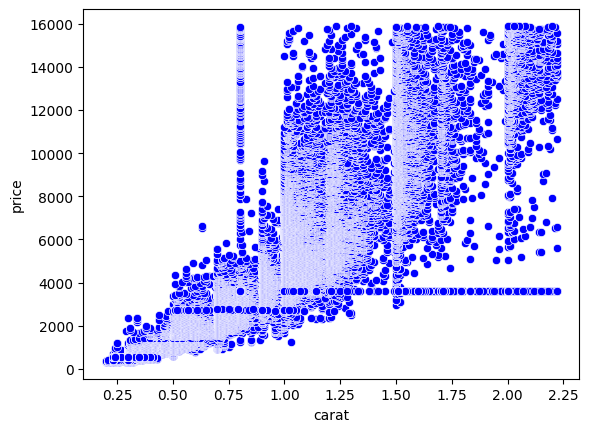

In [201]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='carat', y='price', color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [202]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['carat']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6511.792476]),
 'rank_': 1,
 'singular_': array([104.40796196]),
 'intercept_': -1485.002559272823}

**Y (price) = 6511.79x(carat) -1485.0025**

Eficencia del modelo obtenido 0.7246974382104086
Predicciones del modelo [  12.70971021 -117.52613931   12.70971021 ... 3073.25217393 4115.13897009
 3398.84179773]


<Axes: xlabel='price', ylabel='carat'>

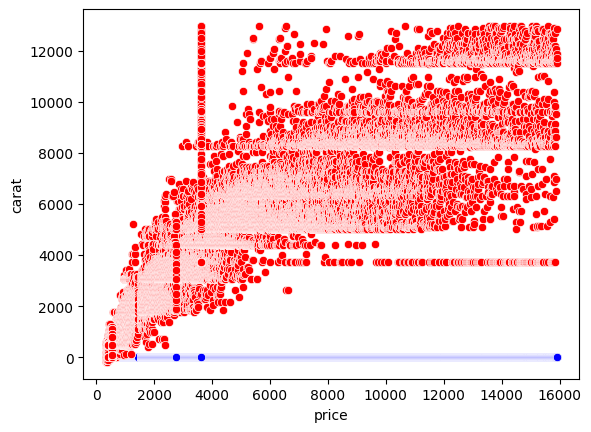

In [203]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['carat']])
print("Predicciones del modelo",y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='carat', color="blue", data=df)
sns.scatterplot(x='price', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)



In [204]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:" ,coef_Deter)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: " ,coef_Correl)

Coeficiente de determinación: 0.7246974382104086
Coeficiente de correlación:  0.8512916293553041


***Modelo para predecir Price con Depth***

<Axes: xlabel='depth', ylabel='price'>

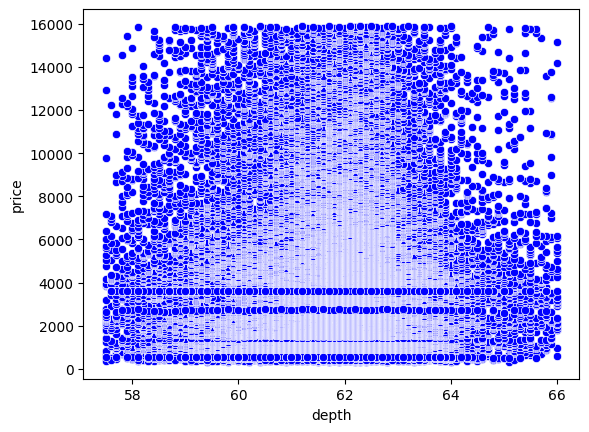

In [205]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='depth', y='price', color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [206]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['depth']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.29803351]),
 'rank_': 1,
 'singular_': array([295.84269038]),
 'intercept_': 4016.3877175308116}

**Y (price) = -6.2980x(depth) + 4016.38**

Eficencia del modelo obtenido 5.442770306340883e-06
Predicciones del modelo [3629.05865664 3639.7653136  3627.79904993 ... 3620.87121307 3620.87121307
 3624.65003318]


<Axes: xlabel='price', ylabel='depth'>

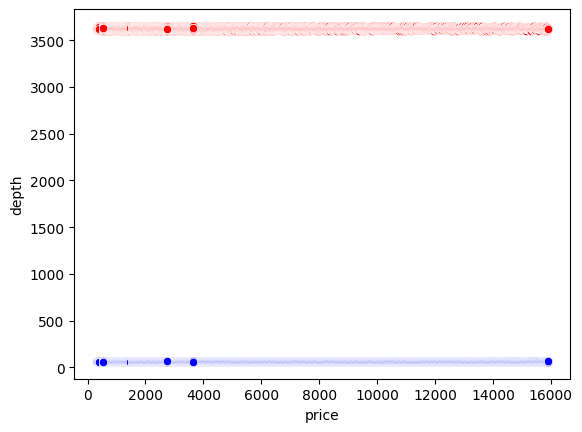

In [207]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['depth']])
print("Predicciones del modelo",y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='depth', color="blue", data=df)
sns.scatterplot(x='price', y='Predicciones2', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [208]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:" ,coef_Deter)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: " ,coef_Correl)

Coeficiente de determinación: 5.442770306340883e-06
Coeficiente de correlación:  0.002332974561871793


***Modelo para predecir Price con Table***

<Axes: xlabel='table', ylabel='price'>

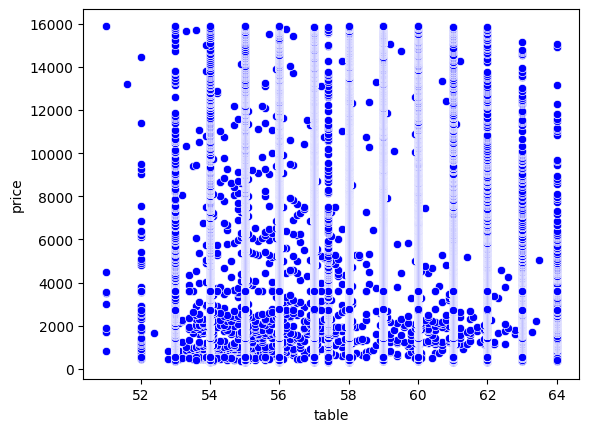

In [209]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='table', y='price', color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [210]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['table']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['table'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([208.24581304]),
 'rank_': 1,
 'singular_': array([491.13303308]),
 'intercept_': -8326.710612257197}

**Y (price) = 208.24x(table) - 8326.71**

Eficencia del modelo obtenido 0.016399825733914852
Predicciones del modelo [3126.80910492 4376.28398315 3626.59905621 ... 4168.03817011 3751.54654403
 3126.80910492]


<Axes: xlabel='price', ylabel='depth'>

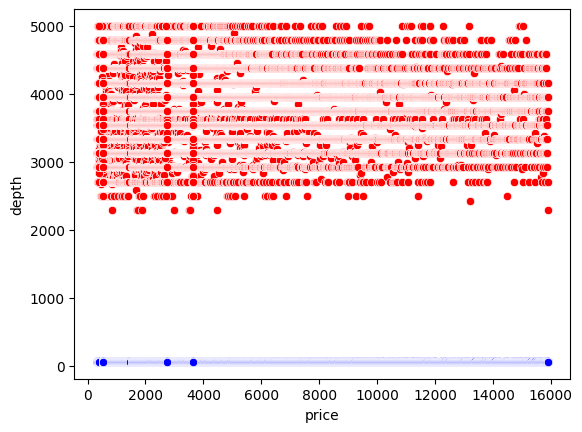

In [211]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['table']])
print("Predicciones del modelo",y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='depth', color="blue", data=df)
sns.scatterplot(x='price', y='Predicciones3', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [212]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:" ,coef_Deter)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: " ,coef_Correl)

Coeficiente de determinación: 0.016399825733914852
Coeficiente de correlación:  0.12806180435209732


# Regresión Multiple

***Modelo para predecir Price con  Carat y depth***

<Axes: xlabel='carat', ylabel='price'>

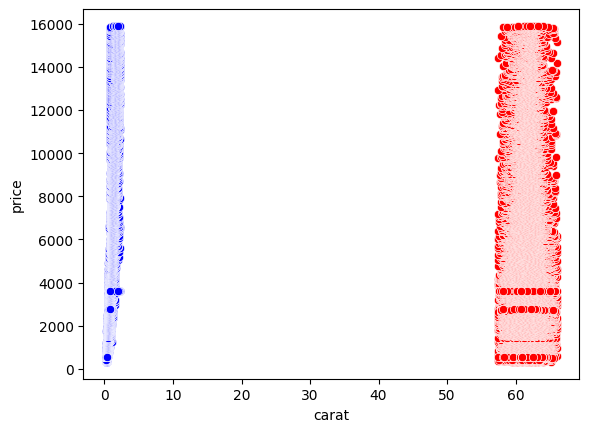

In [213]:
from turtle import color


sns.scatterplot(x='carat', y='price', color="blue", data=df)
sns.scatterplot(x='depth', y='price', color="red", data=df)

In [214]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['carat', 'depth']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'depth'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([6512.81102373,  -32.06502889]),
 'rank_': 2,
 'singular_': array([295.8453351 , 104.40046778]),
 'intercept_': 493.9451326394892}

***Y (price)= 6512.811023734(carat) - 32.06502889(depth) + 493.9451326394892***

Eficencia del modelo obtenido 0.724838503043968
Predicciones de modelo [  19.89239137  -55.85327999   13.47938559 ... 3039.22903497 4081.27879876
 3384.10860349]


<Axes: xlabel='carat', ylabel='price'>

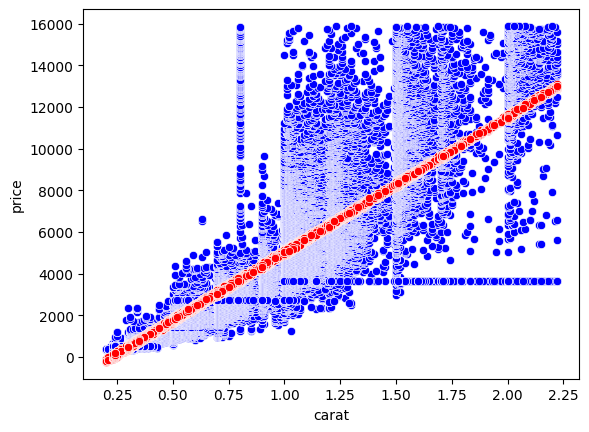

In [215]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['carat', 'depth']])
print("Predicciones de modelo", y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='carat', y='price', color="blue", data=df)
sns.scatterplot(x='carat', y='Predicciones4', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [216]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determianción: ",coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: ",coef_Correl)

Coeficiente de determianción:  0.724838503043968
Coeficiente de correlación:  0.851374478736571


***Modelo para predecir Price con  Carat y table***

<Axes: xlabel='carat', ylabel='price'>

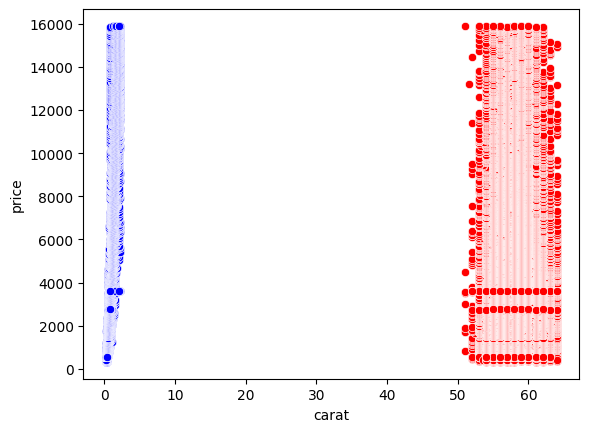

In [217]:
from turtle import color

sns.scatterplot(x='carat', y='price', color="blue", data=df)
sns.scatterplot(x='table', y='price', color="red", data=df)

In [218]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['carat', 'table']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([6555.15764938,  -49.78721903]),
 'rank_': 2,
 'singular_': array([491.53070574, 102.5194812 ]),
 'intercept_': 1338.96114157089}

***Y (price)= 6555.15764938(carat) - 49.78721903(table) + 1338.96114157089***

Eficencia del modelo obtenido 0.7256026933351217
Predicciones de modelo [ 108.35035444 -321.47611271  -11.13897123 ... 2940.33835451 4088.73801646
 3517.03233211]


<Axes: xlabel='table', ylabel='price'>

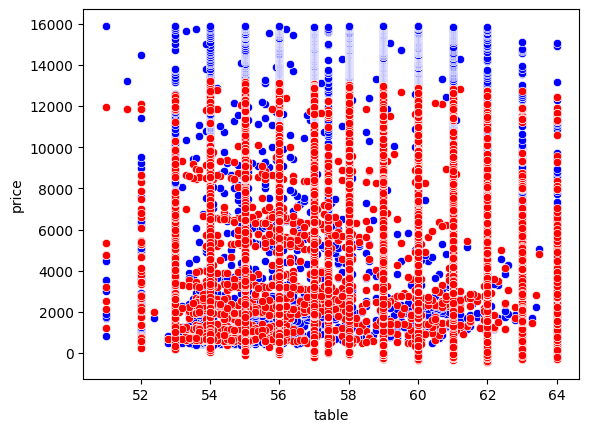

In [219]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['carat', 'table']])
print("Predicciones de modelo", y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='table', y='price', color="blue", data=df)
sns.scatterplot(x='table', y='Predicciones5', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [220]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determianción: ",coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: ",coef_Correl)


Coeficiente de determianción:  0.7256026933351217
Coeficiente de correlación:  0.8518231584872072


***Modelo para predecir Price con depth y table***

<Axes: xlabel='depth', ylabel='price'>

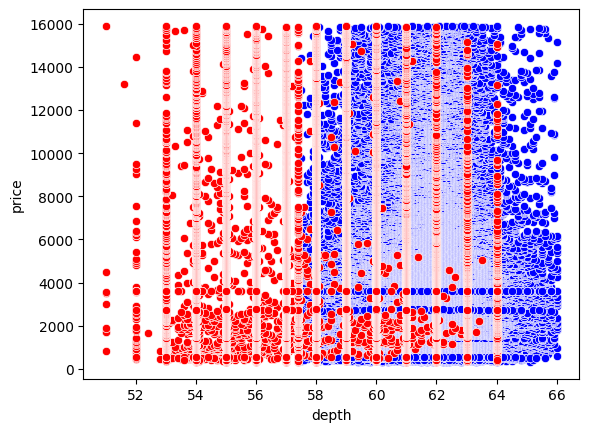

In [221]:
from turtle import color

sns.scatterplot(x='depth', y='price', color="blue", data=df)
sns.scatterplot(x='table', y='price', color="red", data=df)

In [222]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['depth','table']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 96.90692266, 224.41634362]),
 'rank_': 2,
 'singular_': array([501.11357344, 278.6031948 ]),
 'intercept_': -15238.163928243282}

***Y (price)= 96.90692266(depth) + 224.41634362(table) - 15238.163928243282***

Eficencia del modelo obtenido 0.017589544242092692
Predicciones de modelo [3064.5107147  4246.2670079  3622.49132393 ... 4312.57143227 3863.73874503
 3132.34556057]


<Axes: xlabel='depth', ylabel='price'>

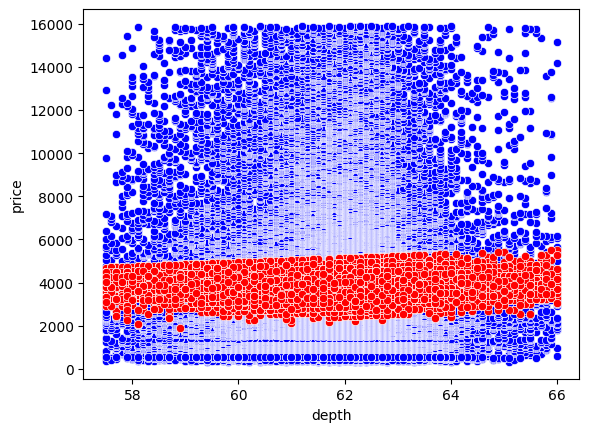

In [223]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['depth', 'table']])
print("Predicciones de modelo", y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='depth', y='price', color="blue", data=df)
sns.scatterplot(x='depth', y='Predicciones6', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)


In [224]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determianción: ",coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: ",coef_Correl)


Coeficiente de determianción:  0.017589544242092692
Coeficiente de correlación:  0.13262557913951853


***Modelo para predecir Price con tamaño (x, y, z)***

<Axes: xlabel='x', ylabel='price'>

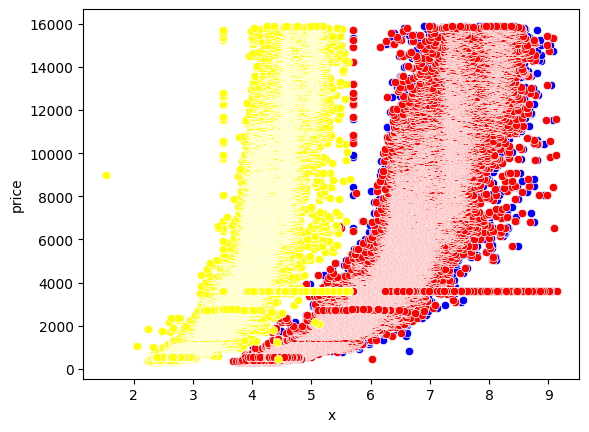

In [225]:
from turtle import color

sns.scatterplot(x='x', y='price', color="blue", data=df)
sns.scatterplot(x='y', y='price', color="red", data=df)
sns.scatterplot(x='z', y='price', color="yellow", data=df)

In [226]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['x', 'y','z']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x', 'y', 'z'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ -44.9089924 , 1916.37495797, 1217.81546905]),
 'rank_': 3,
 'singular_': array([397.93890829,  21.25680268,  12.25135503]),
 'intercept_': -11408.54110736021}

***Y (price)= - 44.9089924(x) + 1916.37495797(y) + 1217.81546905(z) - 11408.54110736021***

Eficencia del modelo obtenido 0.7141327763720718
Predicciones de modelo [ -999.46770479 -1411.20351565  -977.6227141  ...  3557.70682679
  4598.11318646  4011.60877763]


<Axes: xlabel='carat', ylabel='price'>

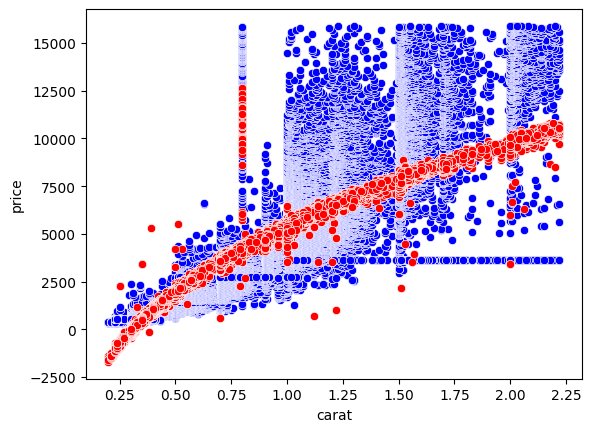

In [227]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['x', 'y','z']])
print("Predicciones de modelo", y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones7', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='carat', y='price', color="blue", data=df)
sns.scatterplot(x='carat', y='Predicciones7', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [228]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determianción: ",coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: ",coef_Correl)

Coeficiente de determianción:  0.7141327763720718
Coeficiente de correlación:  0.8450637705949012


***Modelo para predecir Price con tamaño, carat y depth***

<Axes: xlabel='x', ylabel='price'>

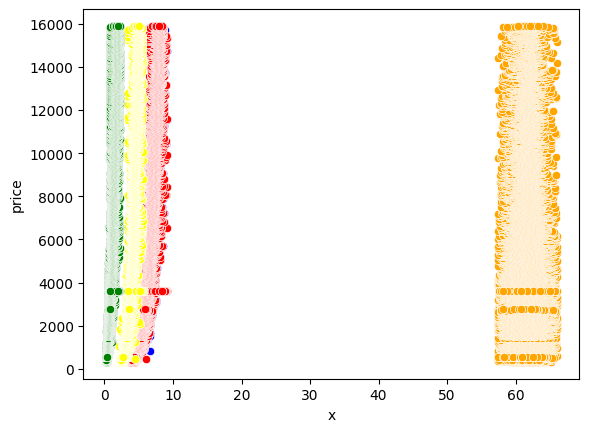

In [229]:
from turtle import color

sns.scatterplot(x='x', y='price', color="blue", data=df)
sns.scatterplot(x='y', y='price', color="red", data=df)
sns.scatterplot(x='z', y='price', color="yellow", data=df)
sns.scatterplot(x='carat', y='price', color="green", data=df)
sns.scatterplot(x='depth', y='price', color="orange", data=df)

In [230]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['x', 'y','z','carat','depth']]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x', 'y', 'z', 'carat', 'depth'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-927.34008311, 1830.02416423,  277.93478685, 3991.53415316,
          -5.5248189 ]),
 'rank_': 5,
 'singular_': array([410.45912252, 296.21634351,  28.46331081,  14.18074965,
         12.21371853]),
 'intercept_': -5325.031330214091}

***Y (price)= - 927.34008311(x) + 1830.02416423(y) + 277.93478685(z) + 3991.53415316(carat) - 5.5248189(depth) + 5325.031330214091***

Eficencia del modelo obtenido 0.7354063064013754
Predicciones de modelo [-450.87045985 -755.22410322 -413.35943158 ... 3257.32417379 4296.81189146
 3672.50733281]


<Axes: xlabel='x', ylabel='price'>

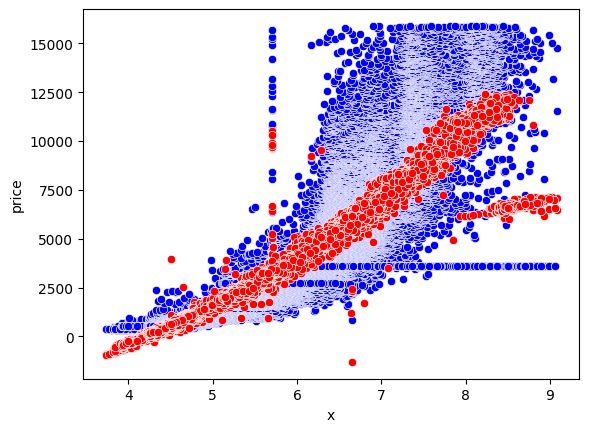

In [231]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['x', 'y' , 'z' ,'carat', 'depth']])
print("Predicciones de modelo", y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones8', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='x', y='price', color="blue", data=df)
sns.scatterplot(x='x', y='Predicciones8', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [232]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determianción: ",coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: ",coef_Correl)

Coeficiente de determianción:  0.7354063064013754
Coeficiente de correlación:  0.8575583399404237


***Modelo para predecir Price con tamaño, carat, depth y table***

<Axes: xlabel='x', ylabel='price'>

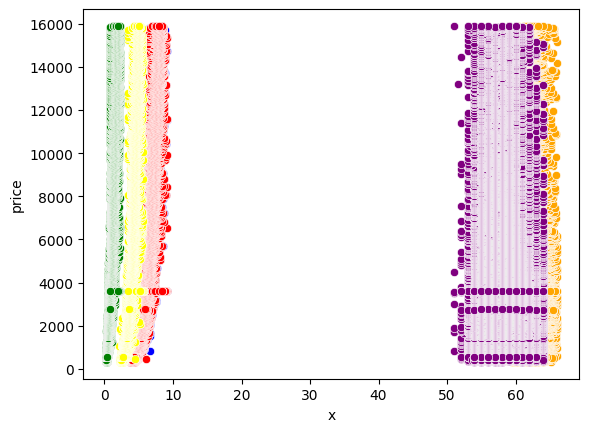

In [233]:
from turtle import color

sns.scatterplot(x='x', y='price', color="blue", data=df)
sns.scatterplot(x='y', y='price', color="red", data=df)
sns.scatterplot(x='z', y='price', color="yellow", data=df)
sns.scatterplot(x='carat', y='price', color="green", data=df)
sns.scatterplot(x='depth', y='price', color="orange", data=df)
sns.scatterplot(x='table', y='price', color="purple", data=df)

In [234]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['x', 'y','z','carat','depth',"table"]]
Var_Dep= df['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x', 'y', 'z', 'carat', 'depth', 'table'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-767.1494404 , 1713.64605946,  214.70766395, 4029.49313179,
         -28.93078875,  -58.43069155]),
 'rank_': 6,
 'singular_': array([515.31345915, 393.35044745, 277.78169503,  28.43927004,
         14.17587209,  12.16326633]),
 'intercept_': -582.5607408571527}

***Y (price)= - 767.1494404(x) + 1713.64605946(y) + 214.70766395(z) + 4029.49313179(carat) - 28.93078875(depth) - 58.43069155(table) - 582.5607408571527***

Eficencia del modelo obtenido 0.7365420857453111
Predicciones de modelo [-336.8982136  -938.53628626 -431.16974944 ... 3071.19249345 4249.52119752
 3794.5330406 ]


<Axes: xlabel='y', ylabel='price'>

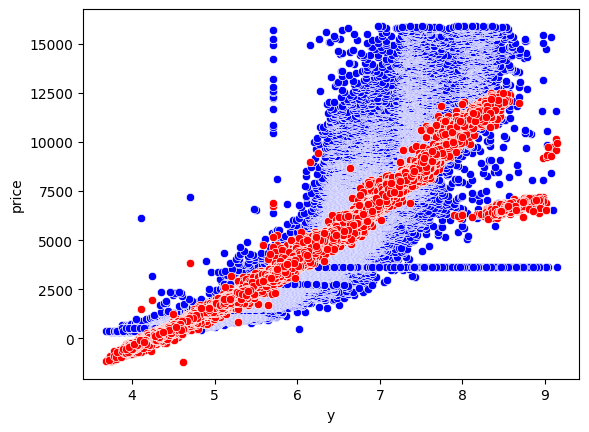

In [235]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print("Eficencia del modelo obtenido",model.score(Vars_Indep,Var_Dep))

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['x', 'y' , 'z' ,'carat', 'depth','table']])
print("Predicciones de modelo", y_pred)

#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones9', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='y', y='price', color="blue", data=df)
sns.scatterplot(x='y', y='Predicciones9', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [236]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determianción: ",coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de correlación: ",coef_Correl)

Coeficiente de determianción:  0.7365420857453111
Coeficiente de correlación:  0.858220301405945


In [238]:
# Datos de los modelos
data = {
    "Modelo": ["Modelo 1", "Modelo 2", "Modelo 3", "Modelo 4", "Modelo 5", "Modelo 6", "Modelo 7", "Modelo 8", "Modelo 9"],
    "Variables independientes (X)": [
        "Carat", 
        "Depth", 
        "Table", 
        "Carat, Depth", 
        "Carat, Table", 
        "Depth, Table", 
        "X, Y, Z (Tamaño)", 
        "Tamaño (X, Y, Z), Carat, Depth", 
        "Tamaño (X, Y, Z), Carat, Depth, Table"
    ],
    "Coeficiente de determinación (R²)": [
        0.7247, 
        0.0000054, 
        0.0164, 
        0.7248, 
        0.7256, 
        0.0176, 
        0.7141, 
        0.7354, 
        0.7365
    ],
    "Coeficiente de correlación (r)": [
        0.8513, 
        0.0023, 
        0.1281, 
        0.8514, 
        0.8518, 
        0.1326, 
        0.8451, 
        0.8576, 
        0.8582
    ]
}

# Crear DataFrame
tabla_comparativa = pd.DataFrame(data)

# Mostrar el DataFrame
tabla_comparativa


,Modelo,Variables independientes (X),Coeficiente de determinación (R²),Coeficiente de correlación (r)
0,Modelo 1,Carat,0.724700,0.8513
1,Modelo 2,Depth,0.000005,0.0023
2,Modelo 3,Table,0.016400,0.1281
3,Modelo 4,"Carat, Depth",0.724800,0.8514
4,Modelo 5,"Carat, Table",0.725600,0.8518
5,Modelo 6,"Depth, Table",0.017600,0.1326
6,Modelo 7,"X, Y, Z (Tamaño)",0.714100,0.8451
7,Modelo 8,"Tamaño (X, Y, Z), Carat, Depth",0.735400,0.8576
8,Modelo 9,"Tamaño (X, Y, Z), Carat, Depth, Table",0.736500,0.8582


Al analizar los coeficientes de determinación (\(R^2\)) y los coeficientes de correlación (\(r\)) de los modelos, se concluye que el **Modelo 9**, que incluye las variables **Tamaño (X, Y, Z)**, **Carat**, **Depth** y **Table**, es el mejor para predecir el **precio**. Este modelo presenta el coeficiente de determinación más alto (\(R^2 = 0.7365\)) y el coeficiente de correlación más alto (\(r = 0.8582\)), lo que indica que aproximadamente el 73.65% de la variación en el precio puede ser explicada por las variables incluidas. Esto sugiere una relación fuerte entre las variables independientes y el precio, haciendo que este modelo sea el más efectivo.

Las diferencias en los coeficientes entre los modelos se deben principalmente a las variables utilizadas. Los modelos simples, que incluyen solo una variable, tienden a mostrar coeficientes más bajos, mientras que los modelos que combinan múltiples variables pueden capturar interacciones y relaciones más complejas. Por ejemplo, la inclusión de **Tamaño** permite un mejor ajuste, superando a modelos que utilizan variables de forma aislada. Sin embargo, es fundamental evaluar la relevancia de cada variable para evitar el sobreajuste, ya que un modelo que se ajuste demasiado a los datos de entrenamiento podría no generalizar bien a nuevos datos.